# Limpieza de datos 
Realizado por : Rolando Ortiz Herbas

#  Cargar librerias de trabajo

In [40]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Cargar el dataset de trabajo

In [41]:
ruta = "C:/Users/Roland/Documents/UNAD_MEXICO_Matematicas_2022/Semestre_2024_1/ZZZ_Word_y_PT/DatosClientes/Clientes_Dos_Mil.csv"
datasetT = pd.read_csv(ruta)

# Muestra el dataset cargado

In [42]:
print(datasetT.shape)
datasetT.head()

(2000, 31)


,Nocliente,Ocupacion,NoPago,TotalMonto,EstadoContrato,Producto,Plazo,FechaInicioC,FechaAdjudicación,FechaUltimoPago,...,Genero,PersonaTipo,dtEstadoContrato,GrupoOrigenVenta,SemanasAdjud,Pagos9,Domicilia_Pago,Email,timetotV,Y
0,1,Ejecutivo (a),35,302783,Subastado con 013,Autos,60,2015-04-17,2015-04-17,2018-02-21,...,Mujer,Fisica,"Subasta (0,20]",evento,0.0,9,1,1,36,1
1,7601,Coordinador (a),38,211366,Subastado con 012,Autos,60,2015-02-20,2015-02-20,2018-02-08,...,Hombre,Fisica,"Subasta (0,20]",modulo-agencia,0.0,9,1,1,40,1
2,9697,Arquitecto (a),50,323640,Sorteo,Autos,60,2015-02-20,2016-01-15,2019-02-18,...,Mujer,Fisica,Sorteo,modulo-agencia,47.0,8,1,1,50,1
3,12999,Gestor (a),60,377036,Sorteo,Autos,60,2015-04-17,2015-07-17,2020-03-05,...,Mujer,Fisica,Sorteo,modulo-agencia,13.0,9,0,1,61,1
4,201301,Propietario (a),45,392349,Subastado con 013,Autos,60,2015-04-17,2015-04-17,2018-12-26,...,Hombre,Moral,"Subasta (0,20]",modulo-agencia,0.0,9,0,1,46,1


#4 Eliminar columnas que contienen un solo valor

In [43]:
datasetT = datasetT.drop('FechaDEfiniquito', axis=1)
datasetT = datasetT.drop('Plazo', axis = 1)
datasetT = datasetT.drop('Nocliente', axis = 1)
# datasetT = datasetT.drop('Y', axis = 1)

# Muestra el dataset con las columnas eliminadas

# Ver las variables categóricas , despues de eliminar las columnas que no nos interesan.
# Con data.info() podemos ver las variables categóricas
# (Dtype=object)

In [ ]:
# datasetT['Ingresos']= datasetT['Ingresos'].astype(int)
datasetT['Ingresos'] = pd.to_numeric(datasetT['Ingresos'], errors='coerce').fillna(0).astype('int64')
datasetT['Ingresos'] = np.where((datasetT['Ingresos'] <= 3500)| (datasetT['Ingresos'].isnull()), 3500 * 4, datasetT['Ingresos'])
datasetT.info()

# Identificar valores faltantes

In [44]:
# Identificar valores faltantes
display(datasetT.isnull().sum())

# Si hay valores faltantes, aplicar estrategias de completar valores o eliminación

Ocupacion                0
NoPago                   0
TotalMonto               0
EstadoContrato           0
Producto                 0
FechaInicioC             0
FechaAdjudicación        0
FechaUltimoPago          0
FechaProyectadaFin       0
MontoVencido             0
Mensualidad              0
Ingresos                 0
Legal                 1480
EdadActual               0
AZULEstatus              0
AdjudicaReal           543
PagosPuntuales           0
CostoAdmin               0
Genero                   0
PersonaTipo              0
dtEstadoContrato         0
GrupoOrigenVenta         0
SemanasAdjud             0
Pagos9                   0
Domicilia_Pago           0
Email                    0
timetotV                 0
Y                        0
dtype: int64

# En este caso y con la información de la tabla anterior del dataset vemos que las columnas
# 'Legal' y 'AdjudicaReal' tienen menos información por lo que la completaremos de
# acuerdo con reglas de negocio de la empresa.

In [45]:

datasetT['Ingresos'] = np.where((datasetT['Ingresos'] == 0) | (datasetT['Ingresos'].isnull()), 
datasetT['Mensualidad'] * 4, datasetT['Ingresos'])


datasetT['Legal'] = np.where((datasetT['Legal'] == 'NA') | (datasetT['Legal'].isnull()), 'Normal', 
datasetT ['Legal'])


datasetT['AdjudicaReal'] = np.where((datasetT['AdjudicaReal'] == 'NA') | (datasetT['AdjudicaReal'].isnull()), 'Normal', datasetT['AdjudicaReal'])

In [46]:
display(datasetT.isnull().sum())

Ocupacion             0
NoPago                0
TotalMonto            0
EstadoContrato        0
Producto              0
FechaInicioC          0
FechaAdjudicación     0
FechaUltimoPago       0
FechaProyectadaFin    0
MontoVencido          0
Mensualidad           0
Ingresos              0
Legal                 0
EdadActual            0
AZULEstatus           0
AdjudicaReal          0
PagosPuntuales        0
CostoAdmin            0
Genero                0
PersonaTipo           0
dtEstadoContrato      0
GrupoOrigenVenta      0
SemanasAdjud          0
Pagos9                0
Domicilia_Pago        0
Email                 0
timetotV              0
Y                     0
dtype: int64

# Limpieza de valores fuera de rango (outliers)
# La columna Mensualidad, la cual tiene un valor mínimo 
# de 11 pesos. Por lo tanto, estos valores se incrementarán a 2,000 pesos. 
# Además, la columna EdadActual presenta un valor mínimo de 10 años. 
# Por ello, todos los valores menores de 18 años se ajustarán a 18 años.
# Visualizaremos graficamente las variables

In [47]:
datasetT['Mensualidad'] = np.where((datasetT['Mensualidad'] <= 1999) | (datasetT['Mensualidad'].isnull()), 2000, datasetT['Mensualidad'])

datasetT['EdadActual'] = np.where((datasetT['EdadActual'] <= 18) | (datasetT['EdadActual'].isnull()), 18, datasetT['EdadActual'])
# Para la columna Legal
datasetT['Legal'] = np.where((datasetT['Legal'] == 'NA') | (datasetT['Legal'].isnull()), 'Normal', datasetT['Legal'])

# Para la columna AdjudicaReal
datasetT['AdjudicaReal'] = np.where((datasetT['AdjudicaReal'] == 'NA') | (datasetT['AdjudicaReal'].isnull()), 'Normal', datasetT['AdjudicaReal'])

# Determinar estadística básica del dataset
# Promedio (mean)
# Desviación estandard (std)
# Valor mínimo
# Valor máximo
# Cuartiles (25%, 50% y 75%)

In [48]:
descripcion = datasetT.describe()

descripcion_formateada = descripcion.applymap(lambda x: f"{x:10.2f}")

print(descripcion_formateada)

           NoPago  TotalMonto MontoVencido Mensualidad    Ingresos  \
count     2000.00     2000.00      2000.00     2000.00     2000.00   
mean        43.87   281266.52     10447.52     4720.82    23616.40   
std         13.79   109728.15     12004.92     1771.53    10306.10   
min          3.00    12705.00         0.00     2000.00     1440.00   
25%         34.00   209467.00      2421.00     3491.00    16358.75   
50%         47.00   282068.50      6783.50     4701.00    22905.50   
75%         56.00   343684.75     13512.00     5727.50    29489.25   
max         60.00   842910.00     94088.00    14048.00    72330.00   

       EdadActual PagosPuntuales  CostoAdmin SemanasAdjud      Pagos9  \
count     2000.00        2000.00     2000.00      2000.00     2000.00   
mean        38.62          41.30    19786.64        41.63        8.07   
std         11.37          14.95     6841.69        29.49        1.02   
min         18.00           0.00     1571.00         0.00        1.00   
25% 

In [49]:
cols_nombres = ['NoPago', 'TotalMonto', 'MontoVencido', 'Mensualidad', 'Ingresos',
           'EdadActual', 'CostoAdmin', 'SemanasAdjud', 'Pagos9', 'Domicilia_Pago',
            'Email', 'timetotV']

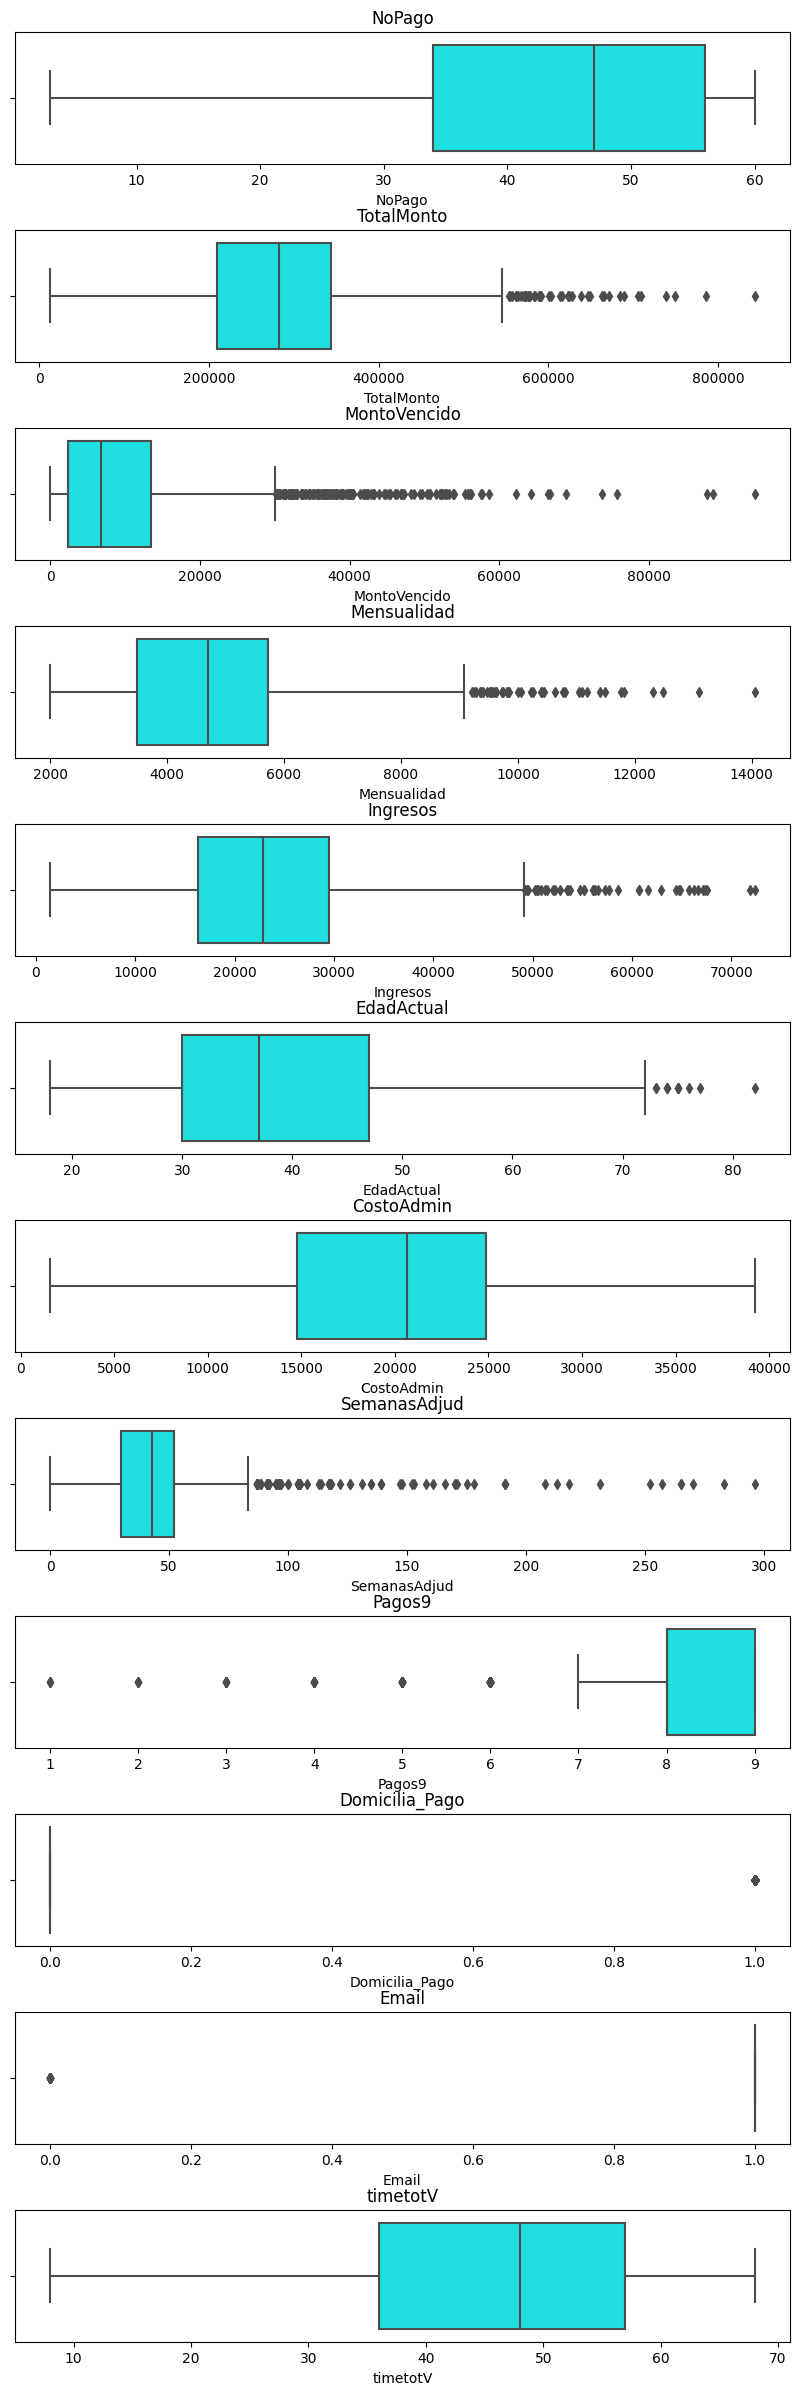

In [50]:
fig, ax = plt.subplots(nrows=12, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=0.5)
print(enumerate(cols_nombres))
for i, col in enumerate(cols_nombres):
    sns.boxplot(x=col, data=datasetT, ax=ax[i], color="cyan")
    ax[i].set_title(col)

In [51]:
filtradoNoconfiables = datasetT.loc[datasetT["Y"] == 0]

In [52]:
descripcion = datasetT.describe()

descripcion_formateada = descripcion.applymap(lambda x: f"{x:10.2f}")

print(descripcion_formateada)

           NoPago  TotalMonto MontoVencido Mensualidad    Ingresos  \
count     2000.00     2000.00      2000.00     2000.00     2000.00   
mean        43.87   281266.52     10447.52     4720.82    23616.40   
std         13.79   109728.15     12004.92     1771.53    10306.10   
min          3.00    12705.00         0.00     2000.00     1440.00   
25%         34.00   209467.00      2421.00     3491.00    16358.75   
50%         47.00   282068.50      6783.50     4701.00    22905.50   
75%         56.00   343684.75     13512.00     5727.50    29489.25   
max         60.00   842910.00     94088.00    14048.00    72330.00   

       EdadActual PagosPuntuales  CostoAdmin SemanasAdjud      Pagos9  \
count     2000.00        2000.00     2000.00      2000.00     2000.00   
mean        38.62          41.30    19786.64        41.63        8.07   
std         11.37          14.95     6841.69        29.49        1.02   
min         18.00           0.00     1571.00         0.00        1.00   
25% 

# Corregir tipografia y todo a minusculas

In [53]:
cols_categoricos = ['Ocupacion', 'EstadoContrato', 'Producto', 'Legal', 'AZULEstatus',
           'AdjudicaReal', 'Genero', 'PersonaTipo', 'dtEstadoContrato', 'GrupoOrigenVenta']

# convertir tipografia a minisculas 

In [54]:
for column in datasetT.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_categoricos:
        datasetT[column] = datasetT[column].str.lower()

# Análisis de columnas categóricas

In [55]:
for col in cols_categoricos:
  print(f'Columna {col}: {datasetT[col].nunique()} subniveles')
  datasetT[col].describe()

Columna Ocupacion: 127 subniveles
Columna EstadoContrato: 10 subniveles
Columna Producto: 2 subniveles
Columna Legal: 2 subniveles
Columna AZULEstatus: 2 subniveles
Columna AdjudicaReal: 3 subniveles
Columna Genero: 2 subniveles
Columna PersonaTipo: 2 subniveles
Columna dtEstadoContrato: 3 subniveles
Columna GrupoOrigenVenta: 6 subniveles


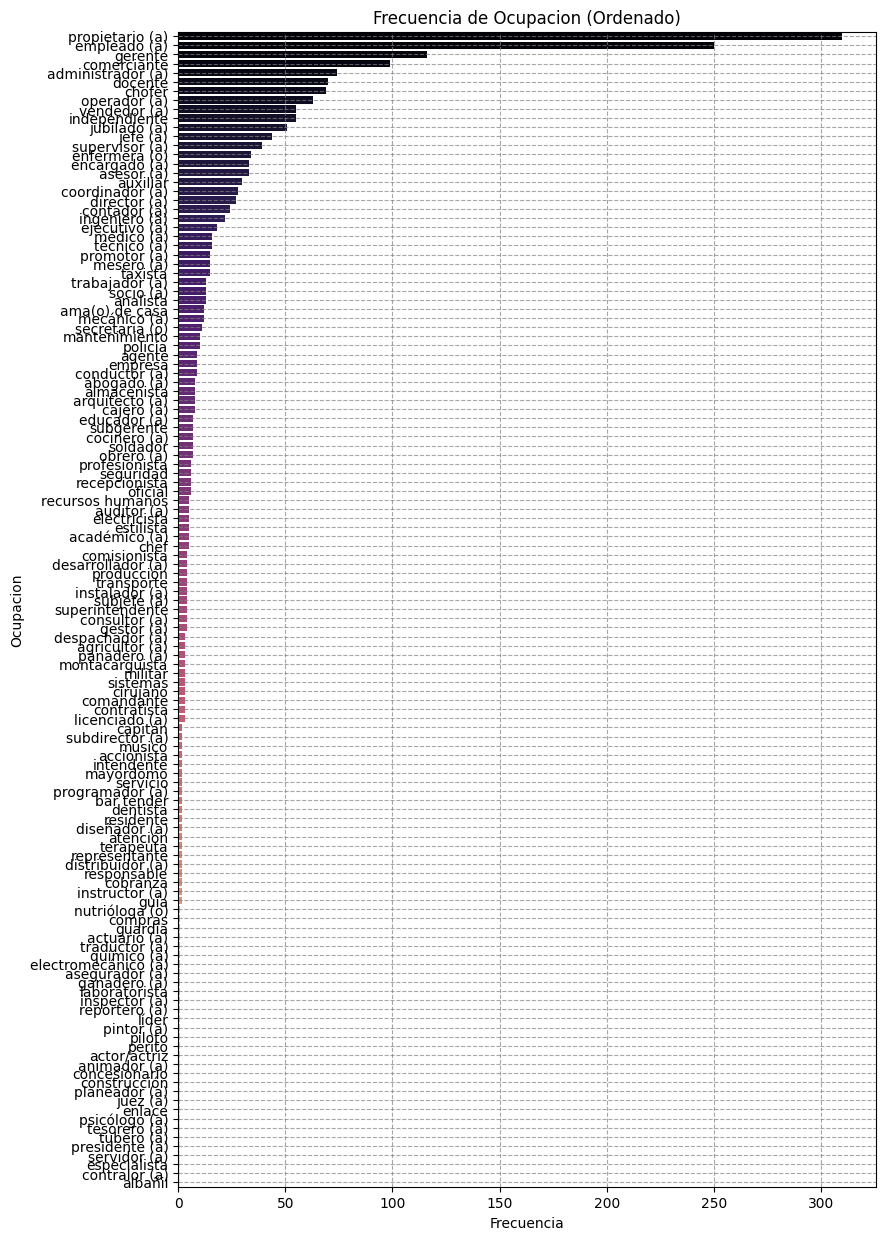

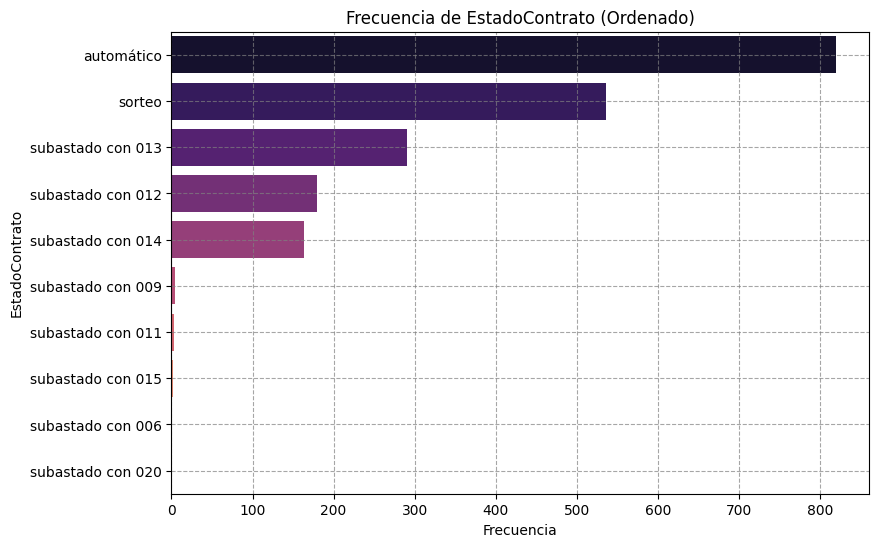

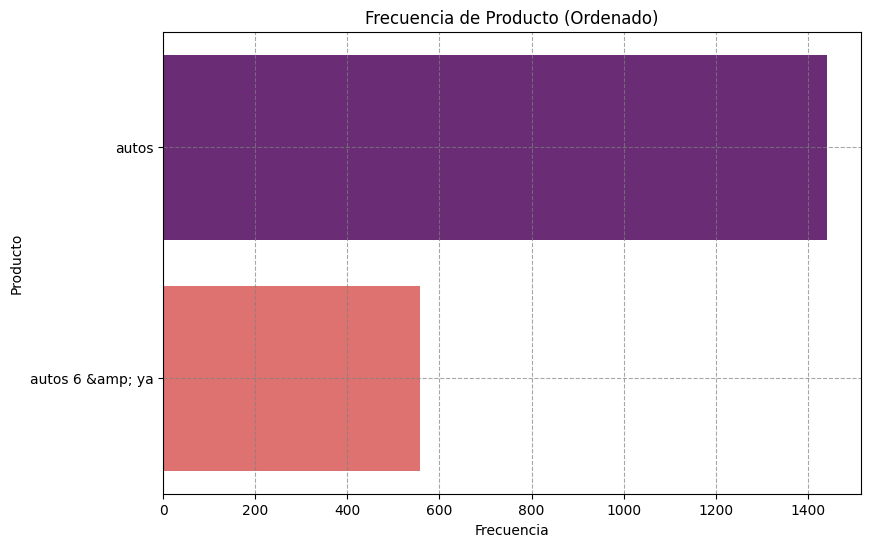

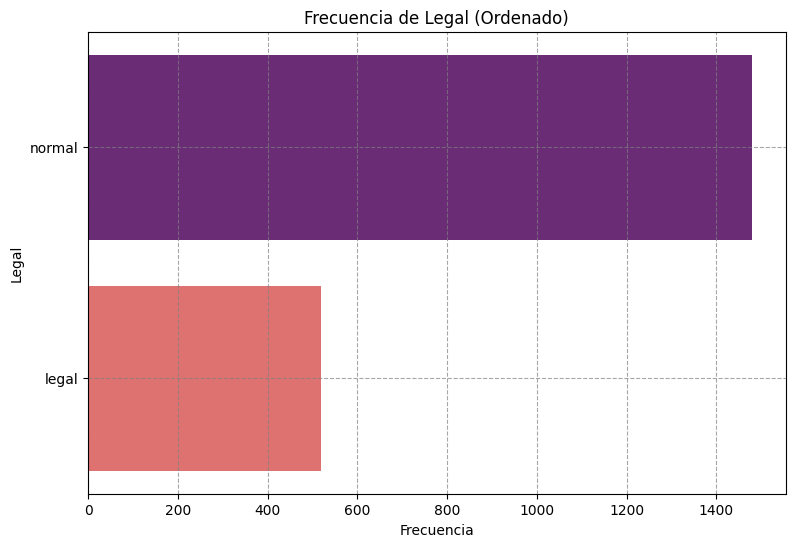

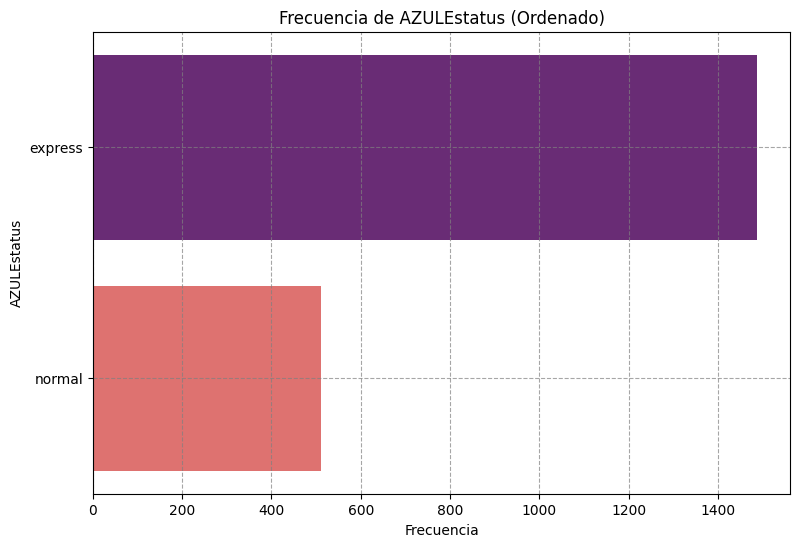

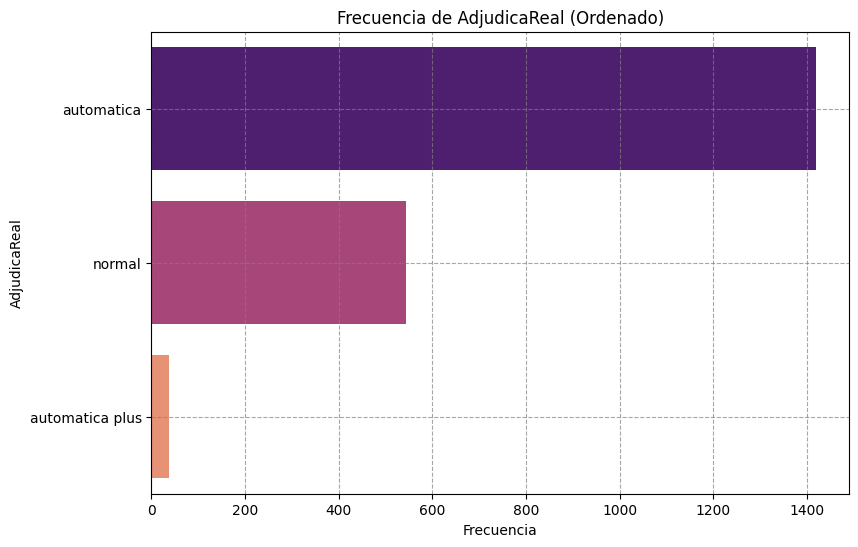

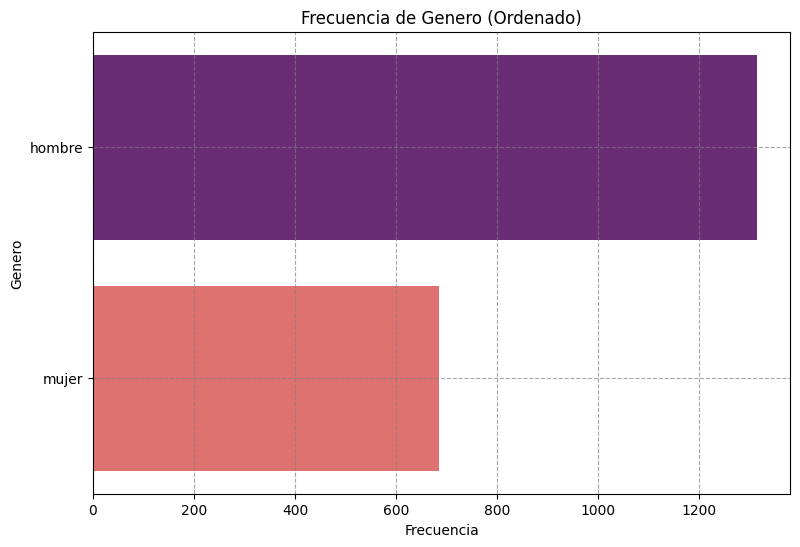

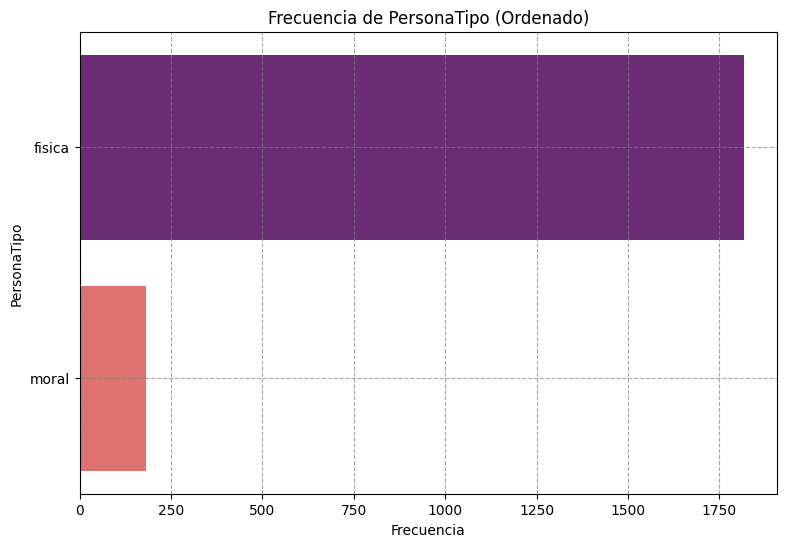

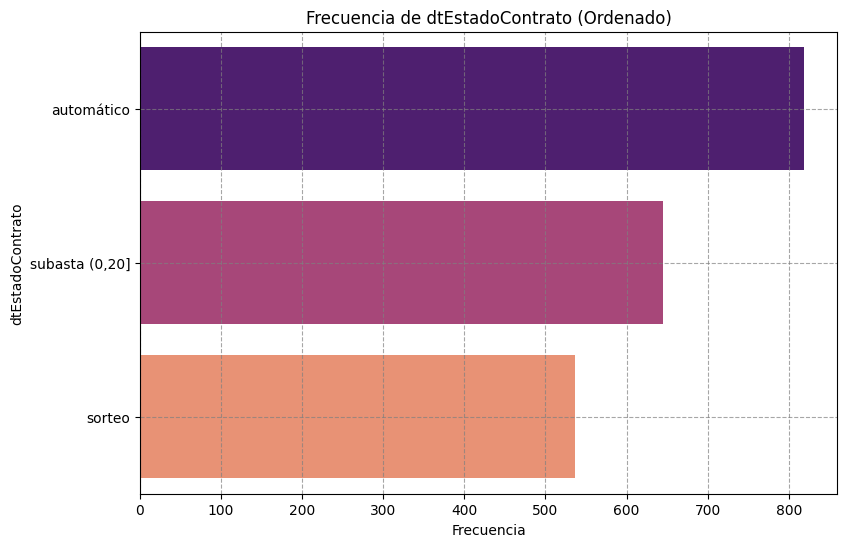

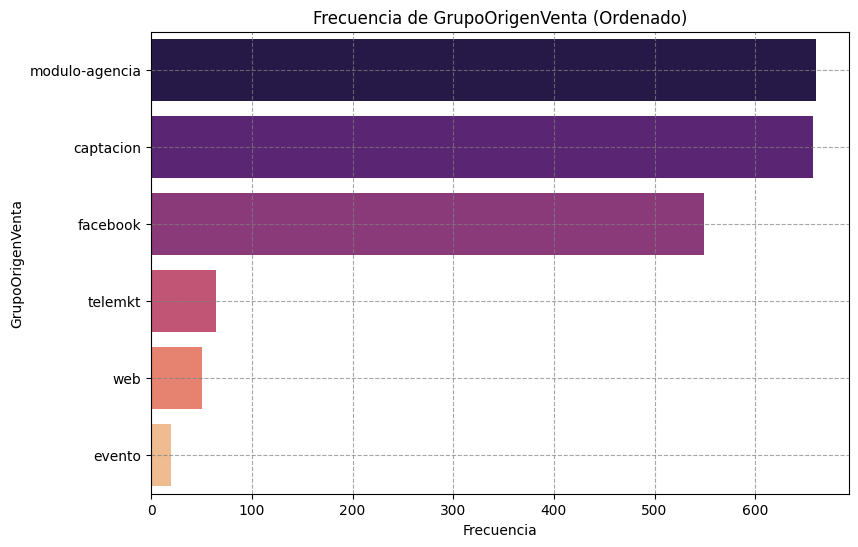

In [56]:
for col in cols_categoricos:
    orden_categorias = datasetT[col].value_counts().index

    # Ajustar el tamaño de la figura
    if col == 'Ocupacion':
        plt.figure(figsize=(9, 15))
    else:
        plt.figure(figsize=(9, 6))

    # Crear la gráfica de conteo en orden descendente
    sns.countplot(data=datasetT, y=col, order=orden_categorias, palette='magma')

    # Títulos y etiquetas
    plt.title("Frecuencia de " + col +" (Ordenado)")
    plt.xlabel("Frecuencia")
    # plt.ylabel("Categorías")
    plt.ylabel(col)
    plt.grid(True, which='both', axis='both', linestyle='--', color='gray', alpha=0.7)

    # Mostrar la gráfica
    plt.show()

# Clasificación y conteo de Clientes No confiables por Genero , Ocupación y GrupoOrigenVentas 

In [58]:

filtradoNoconfiables = datasetT.loc[datasetT["Y"] == 0]
#filtradoNoconfiables['Y']



In [59]:

filtrado = filtradoNoconfiables.query('Y < 1')
# filtrado
filtrado.groupby('Genero')[['Y']].count()

,Y
Genero,
hombre,361
mujer,160


In [60]:
filtrado.groupby('Ocupacion')[['Y']].count()


,Y
Ocupacion,
abogado (a),1
académico (a),1
accionista,1
actor/actriz,1
administrador (a),23
...,...
trabajador (a),2
traductor (a),1
tubero (a),1


In [61]:
filtrado.groupby('GrupoOrigenVenta')[['Y']].count()

,Y
GrupoOrigenVenta,
captacion,202
evento,6
facebook,96
modulo-agencia,182
telemkt,15
web,20


# Clasificación y conteo de Clientes confiables por Genero , Ocupación y GrupoOrigenVentas 

In [62]:
filtradoConfiables = datasetT.loc[datasetT["Y"] == 1]
filtrado = filtradoConfiables.query('Y == 1')
# filtrado
filtrado.groupby('Genero')[['Y']].count()

,Y
Genero,
hombre,954
mujer,525


#  

In [63]:
filtrado.groupby('Ocupacion')[['Y']].count()

,Y
Ocupacion,
abogado (a),7
académico (a),4
accionista,1
actuario (a),1
administrador (a),51
...,...
terapeuta,1
trabajador (a),11
transporte,4


In [64]:
filtrado.groupby('GrupoOrigenVenta')[['Y']].count()

,Y
GrupoOrigenVenta,
captacion,455
evento,14
facebook,453
modulo-agencia,478
telemkt,49
web,30


# Correlaciones entre variables numéricas

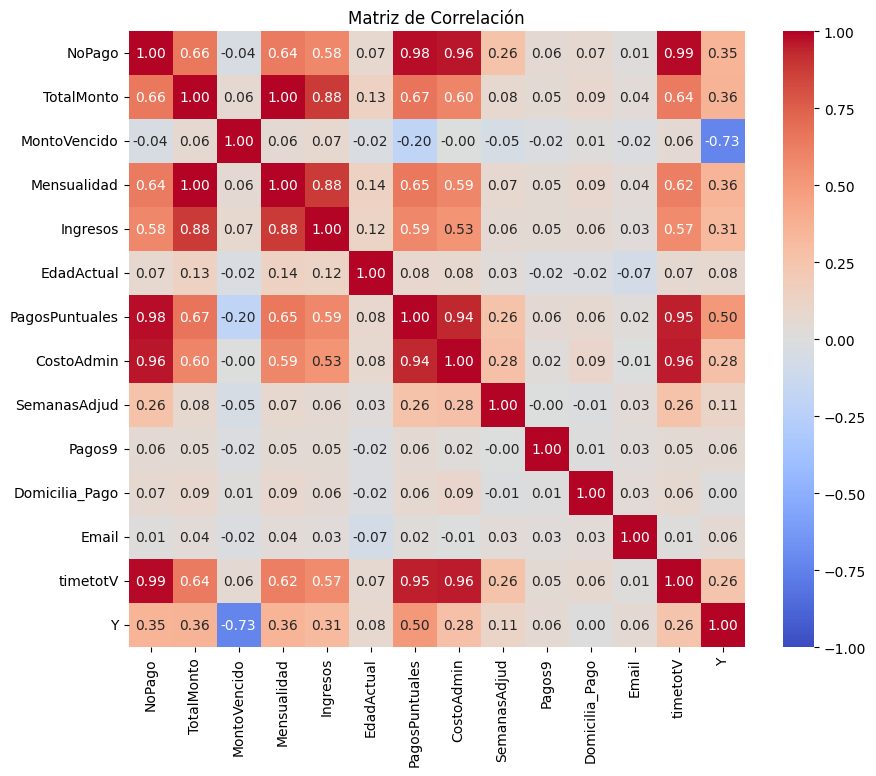

In [65]:
matriz_correlacion = datasetT.corr()

# Crear un mapa de calor con valores numéricos en cada cuadro
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura según tus necesidades
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Matriz de Correlación")
plt.show()

# Guardar el dataset limpio en un archivo CSV

In [66]:
datasetT.to_csv('C:/Users/Roland/Documents/UNAD_MEXICO_Matematicas_2022/Semestre_2024_1/ZZZ_Word_y_PT/DatosClientes/Clientes_Dos_Mil_limpio.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)